# Ćwiczenia 07 - Sieci konwolucyjne cd

1. Użyj `ImageDataGenerator` aby wczytać zbiór Cats&Dogs. Stwórz sieć konwolucyjną do klasyfikacji zbioru. Porównaj kilka modeli o różnych architekturach. Dla każdego stwórz wykres krzywych uczenia.
2. Dodaj do wybranego modelu augmentację danych, stosując odpowiednie opcje w `ImageDataGenerator`, lub dodając warstwy, np. `RandomZoom`, `RandomRotation`, `RandomFlip`, etc. Zob.: https://keras.io/api/layers/preprocessing_layers/image_augmentation/.

In [7]:
import tensorflow as tf
image_size = (224, 224)
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.2)

train = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 

valid = data_generator.flow_from_directory(
    "kagglecatsanddogs_5340/PetImages",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

import matplotlib.pyplot as plt

def plot_training_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'validation'])

    # Loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'validation'])

    plt.show()


Found 19810 images belonging to 2 classes.
Found 4951 images belonging to 2 classes.


the weakest cnn


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     2,986,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,991,137 (11.41 MB)

 Trainable params: 2,991,137 (11.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
510/620 ━━━━━━━━━━━━━━━━━━━━ 1:09 633ms/step - accuracy: 0.6091 - loss: 0.7522

C:\Users\Jarek\PycharmProjects\WUM\pythonProject\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


620/620 ━━━━━━━━━━━━━━━━━━━━ 489s 787ms/step - accuracy: 0.6698 - loss: 0.6174 - val_accuracy: 0.7247 - val_loss: 0.5641
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 192s 310ms/step - accuracy: 0.7642 - loss: 0.4876 - val_accuracy: 0.7332 - val_loss: 0.5414
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 140s 226ms/step - accuracy: 0.8270 - loss: 0.3832 - val_accuracy: 0.7669 - val_loss: 0.5001
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 140s 226ms/step - accuracy: 0.8967 - loss: 0.2489 - val_accuracy: 0.7524 - val_loss: 0.5899
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 139s 224ms/step - accuracy: 0.9504 - loss: 0.1280 - val_accuracy: 0.7661 - val_loss: 0.7428


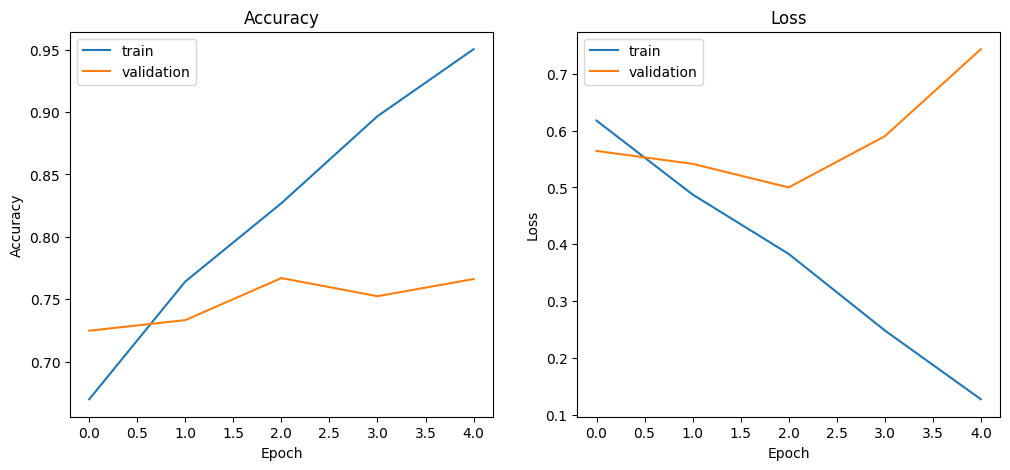

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # wyjście binarne
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("the weakest cnn")
model.summary()

history = model.fit(train, validation_data=valid, epochs=5)
plot_training_curves(history)


better cnn


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,457 (49.36 MB)

 Trainable params: 12,939,009 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1203s 2s/step - accuracy: 0.5759 - loss: 0.9833 - val_accuracy: 0.6580 - val_loss: 0.6994
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1073s 2s/step - accuracy: 0.6409 - loss: 0.6021 - val_accuracy: 0.7009 - val_loss: 0.5706
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1063s 2s/step - accuracy: 0.6775 - loss: 0.5662 - val_accuracy: 0.6976 - val_loss: 0.6375
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.7080 - loss: 0.5189 - val_accuracy: 0.7807 - val_loss: 0.4808
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.7293 - loss: 0.4926 - val_accuracy: 0.7730 - val_loss: 0.4678


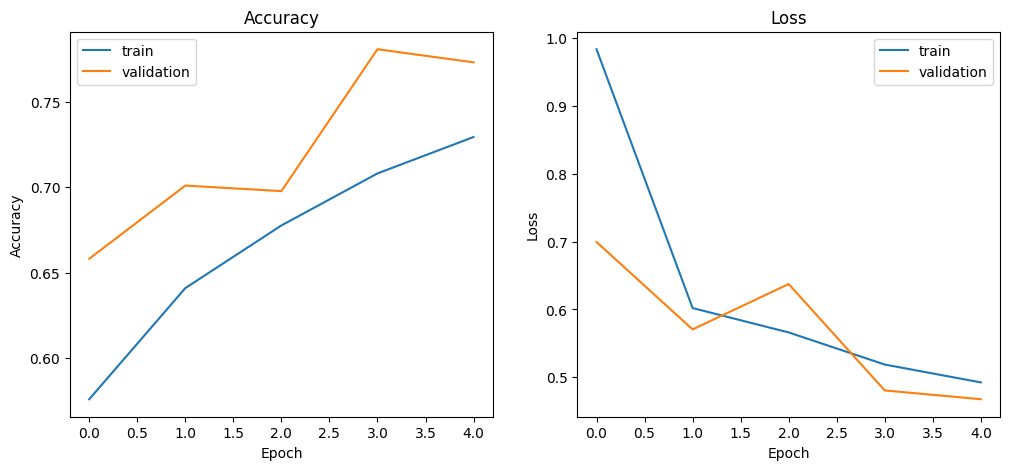

In [9]:
import tensorflow as tf

model2 = tf.keras.Sequential([
    # Blok 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)



print("better cnn")
model2.summary()

history2 = model2.fit(train, validation_data=valid, epochs=5)
plot_training_curves(history2)
